In [113]:
"""
# Colab example - news daum : https://bit.ly/2QtrcrD
"""
# TODO: NOT FINISHED YET!

print(__doc__)



# Colab example - news daum : https://bit.ly/2QtrcrD



In [114]:
import PIL
import easyocr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import ImageDraw
from _path import DIR_HOME, get_cut_dir, stop_if_none

dir_ocr = DIR_HOME + 'src\\easyOCR\\'
dir_result = DIR_HOME + 'src\\resultOCR\\'

In [115]:
# filename = 'korean.png'                 #  5 recogs
# filename = 'namecard_extracted.png'     #  7 recogs
filename = 'english.png'                # 11 recogs
# filename = 'news_daum.png'              # 41 recogs
# filename = 'AI_compete_2020_KOGAS.jpg'  # 72 recogs

size_targeted = (640, 400)              # resize scale
post_fix = filename.split('.')[0].split('_')[0]

In [116]:
# TO LOAD IMAGE
im = PIL.Image.open(dir_ocr + filename)
im = stop_if_none(im, message='Image loading failed!')

im_resize = im.resize(size_targeted, PIL.Image.ANTIALIAS)
im_resize = stop_if_none(im_resize, message='Image loading failed!')

# TO SHOW IMAGES : ORIGINAL vs. RESIZE
# im_resize.show()
# im.show()             # NO need ... im_boxed image shows

reader = easyocr.Reader(['en', 'ko',])
bounds = reader.readtext(dir_ocr + filename)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [117]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

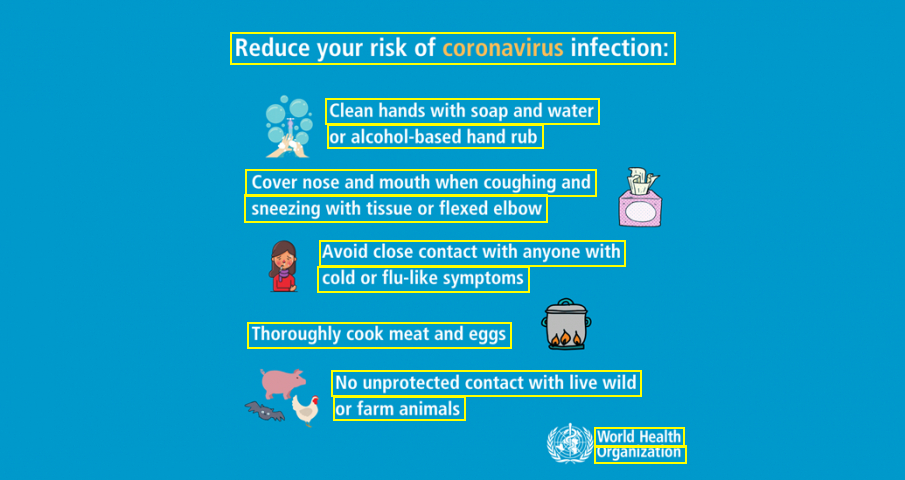

In [118]:
%matplotlib inline
im_boxed = draw_boxes(im, bounds)
# im_boxed.show()

# 저장할 파일 Type : JPEG, PNG 등
# 저장할 때 Quality 수준 : 보통 95 사용
im_boxed.save(dir_result + f"im_boxed_{post_fix}.png", "png", quality=95 )

im_boxed

In [119]:
probs, recogs = [], []

for idx, line in enumerate(bounds):
    recognition = line[-2]
    probablity = line[-1] * 100

    recogs.append([idx, recognition])
    probs.append([idx, probablity])

    print(f"{probablity:0.2f} % ... | {recognition:30}")

3.28 % ... | Reduce your risk of coronavirus infection:
11.50 % ... | Clean hands with soap and water
12.66 % ... | or alcohol based hand rub     
8.02 % ... | Cover nose and mouth when coughing and
18.18 % ... | sneezing with tissue or flexed elbow
19.46 % ... | Avoid close contact with anyone with
17.05 % ... | cold or flu-like symptoms     
9.64 % ... | Thoroughly cook meat and eggs 
8.66 % ... | No unprotected contact with live wild
55.10 % ... | or farm animals               
64.68 % ... | World Health                  
74.60 % ... | Organization                  


In [120]:
# TO ANALYZE STATICS of PROBABLITY
df_probs = pd.DataFrame(probs)
print(df_probs[1].describe())

count    12.000000
mean     25.236737
std      24.639728
min       3.281687
25%       9.398388
50%      14.854768
75%      28.367488
max      74.603105
Name: 1, dtype: float64


In [121]:
for prob in probs:
    print(prob)

[0, 3.2816872000694275]
[1, 11.503543704748154]
[2, 12.657591700553894]
[3, 8.018597960472107]
[4, 18.18138062953949]
[5, 19.456815719604492]
[6, 17.051944136619568]
[7, 9.644994139671326]
[8, 8.658567816019058]
[9, 55.09950518608093]
[10, 64.68310952186584]
[11, 74.60310459136963]


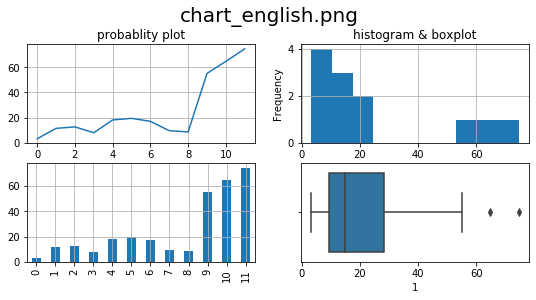

In [122]:
# TO DRAW GRAPH : PLOT / HISTOGRAM
fig, axes = plt.subplots(2,2, figsize=(9,4))
plt.suptitle(f"chart_{post_fix}.png",fontsize=20, y=1.01)     # y=gap

df_probs[1].plot(
                ax=axes[0,0], 
                title="probablity plot", 
                grid=1,
            )
df_probs[1].plot(
                kind='hist', 
                ax=axes[0,1], 
                title="histogram & boxplot", 
                grid=1,
            )
df_probs[1].plot(
                kind='bar',
                ax=axes[1,0], 
                grid=1,
            )
sns.boxplot(
                df_probs[1], 
                ax=axes[1,1],
            )


plt.savefig(dir_result + f"chart_{post_fix}.png")
plt.show()